# 22장 시퀀스 배열로 다루는 순환 신경망

지금 까지 학습시키는 방법은 각각의 속성이 서로 영향을 미치지 않는 학습 방법이었습니다. 즉 각가의 속성의 특성들을 분석하여 예측을 하는 방법이었다면<BR />

"오늘의 주가가 몇이야"라는 것을 알려면 앞에 있는 단어를 알아야 하기 때문에 각각의 단어들이 영관성이 있다는 것을 알 수 있다.<BR />

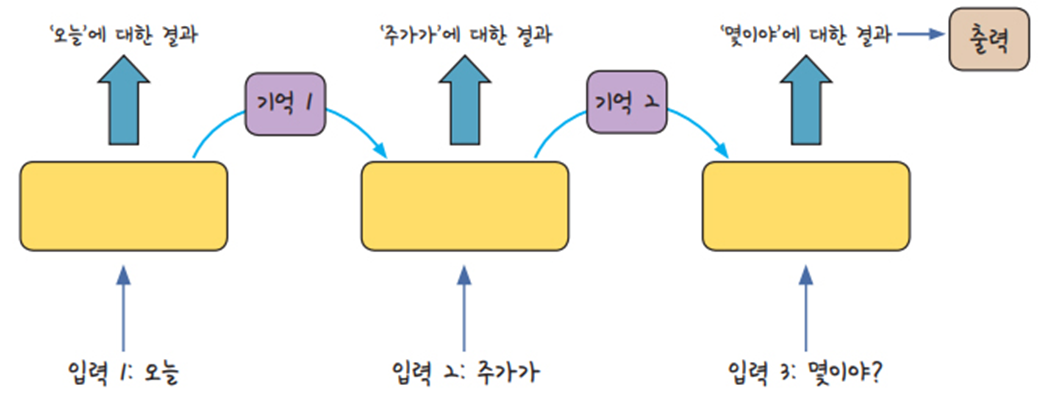<BR />
오늘을 알아야 주가가를 알아야 몇이야라는 것에 대한 답을 해줄 수 있다는 것이다.<BR />
입력 값을 하나씩 기억해서 다음으로 넘겨주고 또 기억해서 넘겨줘야지만 결과를 알 수 있는 것이기 때문에 입력이 반복해서 들어오므로 순환신경망이라고 불리는 것이다.

앞에서 입력한 방법을 기억하지 못하는 문제가 발생할 수 있기 때문에 보안한 방법이 LSTM이라는 섹터가 있어서 다음으로 넘길 것인지 아닌지를 관리를 해준다<br />
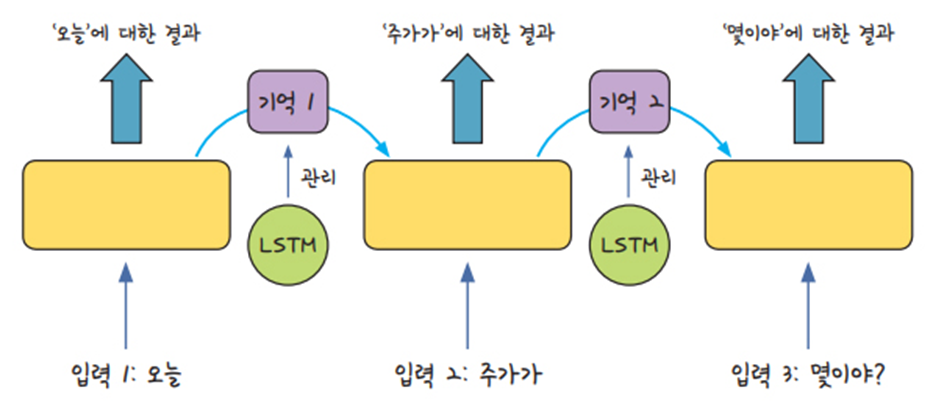

## 1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.            # num_words : 기사가 많을 경우 단어를 1000개까지만 가지고 와라
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)  # 테스트셋은 20%

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


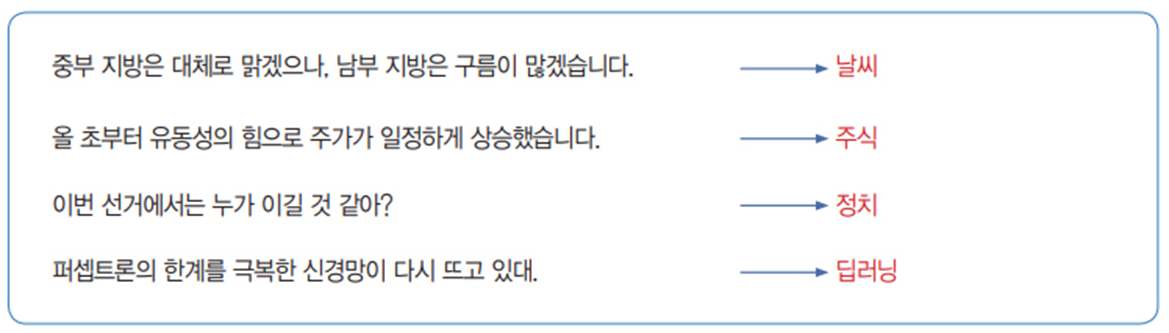<br />
그림과 같이 어떤 카테고리에 해당하는 뉴스인지를 분류한다.

In [ ]:
# 데이터를 확인해 보겠습니다.
category = np.max(y_train) + 1 # 어떤 카테고리에 해당하는지를 확인하려고 한다.
print(category, '카테고리')  # 카테고리의 수는 46개
print(len(X_train), '학습용 뉴스 기사') # 8982 학습용 뉴스 기사
print(len(X_test), '테스트용 뉴스 기사') # 2246 테스트용 뉴스 기사
print(X_train[0])
'''
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
'''
# 학습용 기사들의 단어의 빈도수가 얼마나 되는지 알려주는 것이다 1은 빈도수가 높은 거 447은 빈도수가 낮은 거
# 빈도수에 따라서 토큰화된 단어의 index를 출

In [2]:
# 단어의 수를 맞추어 줍니다.              # maxlen는 단어의 수가 많은 경우 100개까지만 가지고 오라는 것이다.
# 각 문장 마다 단어수가 다르므로 단어의 수를 맞혀주는 걸로 단어를 100개까지 사용하개 한다,
X_train = sequence.pad_sequences(X_train, maxlen=100) # 즉 같은 단어가 반복되어도 각을 하나씩으로 취급한다, 
X_test = sequence.pad_sequences(X_test, maxlen=100)   # 100보다 길면 잘라낸다.

# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100)) # Embedding은 단어는 1000개를 받고 각 단어의 벡터는 100으로 
model.add(LSTM(100, activation='tanh'))   # tanh는 -1~1 사이의 값을 출력하는 활성화 함수
model.add(Dense(46, activation='softmax')) # 46개의 카테고리중 하나 사용

# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.4195 - loss: 2.4102 - val_accuracy: 0.5374 - val_loss: 1.8253
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.5476 - loss: 1.7830 - val_accuracy: 0.5592 - val_loss: 1.6755
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5860 - loss: 1.6042 - val_accuracy: 0.6269 - val_loss: 1.5185
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.6527 - loss: 1.3871 - val_accuracy: 0.6549 - val_loss: 1.3750
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.6841 - loss: 1.2576 - val_accuracy: 0.6759 - val_loss: 1.2867
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.7049 - loss: 1.1522 - val_accuracy: 0.6874 - val_loss: 1.2237
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.7405 - loss: 1.0315 - val_accuracy: 0.7106 - val_loss: 1.1668
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.7687 - loss: 0

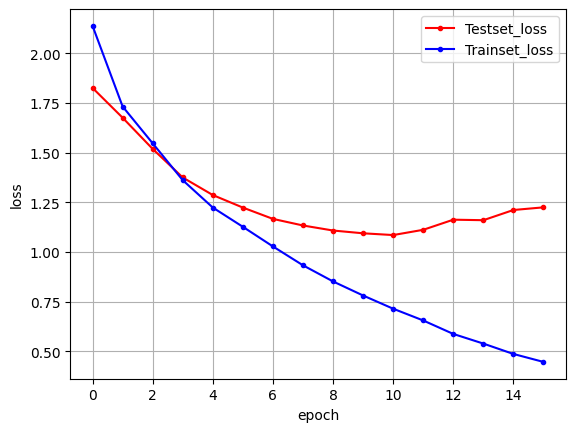

In [3]:
# 학습셋과 테스트셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 2. LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

### LSTM 앞에 CNN을 사용하면, CNN이 시퀀스 내 지역적 특징을 먼저 추출해 주므로, LSTM은 이미 추출된 특징을 기반으로 학습하게 되어 LSTM만 사용할 때보다 학습 효율이 높아질 수 있다 .

 Conv1D사용<br />
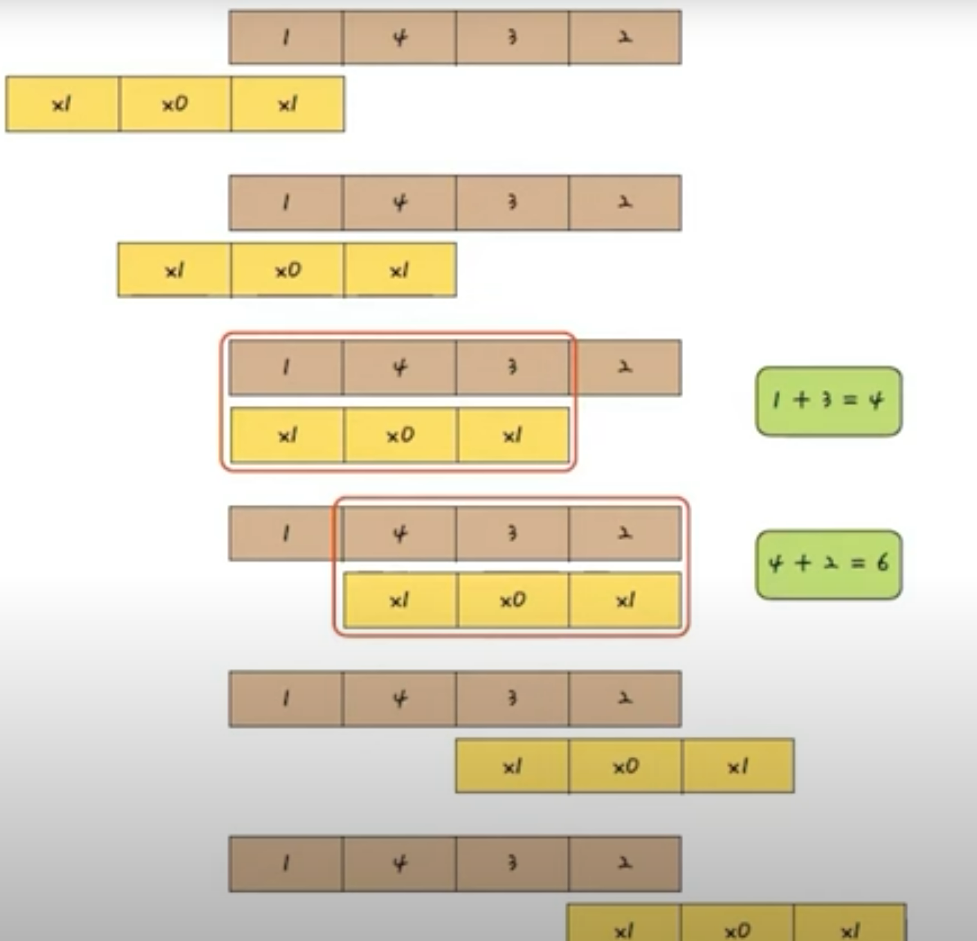

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다.
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100))
model.build((None, 500))
model.add(Dropout(0.5))
model.add(Conv1D(64, # 생성할 특징 맵(feature map) 수 = 64개
                 5, # 5단어씩 슬라이딩하면서 특징 추출
                 padding='valid',  # 패딩 없이, 경계 밖은 계산 안함
                 activation='relu',
                 strides=1)) # 한 칸씩 이동
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 100)       │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 496, 64)        │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 124, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 55)             │        26,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 558,520 (2.13 MB)

 Trainable params: 558,520 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - accuracy: 0.6811 - loss: 0.5548 - val_accuracy: 0.8845 - val_loss: 0.2806
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9039 - loss: 0.2421 - val_accuracy: 0.8896 - val_loss: 0.2714
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9315 - loss: 0.1826 - val_accuracy: 0.8946 - val_loss: 0.2612
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9507 - loss: 0.1425 - val_accuracy: 0.8866 - val_loss: 0.2815
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9581 - loss: 0.1138 - val_accuracy: 0.8941 - val_loss: 0.3030
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9702 - loss: 0.0903 - val_accuracy: 0.8878 - val_loss: 0.3315
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8793 - loss: 0.3671

 Test Accuracy: 0.8805


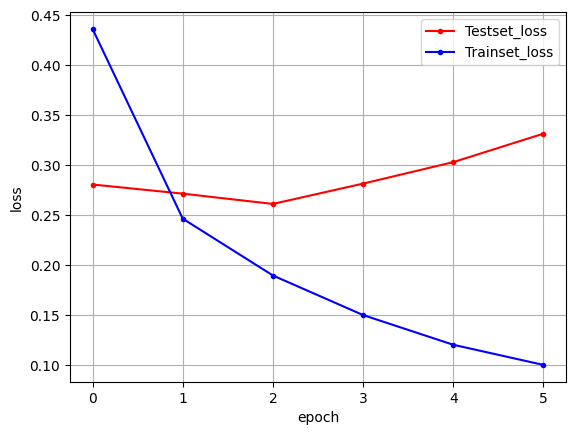

In [6]:
# 학습셋과 테스트셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 3. Seq2Seq 모델과 어텐션

단지 긍정이다. 부정이다 치매환자다 아니다를 얘측하는 것이 아니라<br />
"오늘 날씨 어때"라고 할 때 "How is the weather today"를 출력해야 한다.
즉 자여어를 사용하는 생성형 모델이 필요하게 된 것이다. 이때 필요한 알고리즘이 Seq2Seq이다.

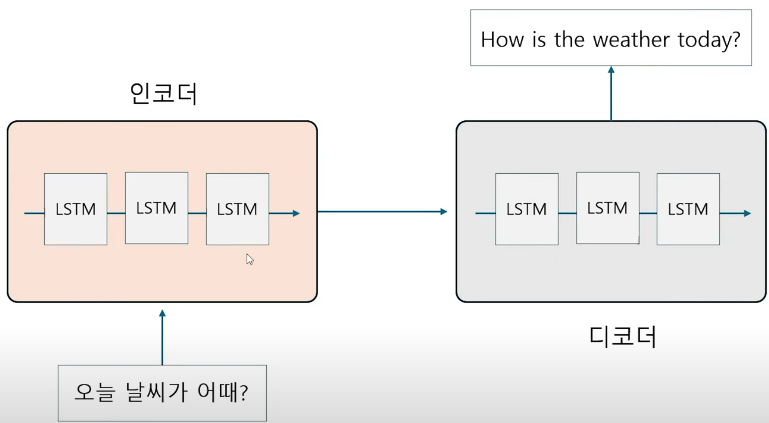<br />
**인코더(Encoder)**와 **디코더(Decoder)**라는 두 개에 LSTM과 RNN 계열 모델(또는 Transformer)을 연결해서 사용한다<br />
Seq2Seq = (Encoder → Context Vector → Decoder) 구조로, 입력 시퀀스를 출력 시퀀스로 바꾸는 신경망 프레임워크입니다<br />

Seq2Seq(Sequence-to-Sequence) 모델은 입력 시퀀스를 받아 출력 시퀀스로 변환하는 신경망 구조입니다. 주로 기계 번역, 챗봇, 텍스트 요약, 음성 인식 등 “입력과 출력이 모두 시퀀스인 문제”를 해결할 때 사용됩니다.<br />
입력 시퀀스와 출력 시퀀스의 길이가 달라도 된다.(예: 영어 문장 5단어 → 한국어 문장 7단어)<br />

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# 예제용 데이터셋
# 한국어 입력 (X_data)
# "오늘 날씨 어때"   → [1, 2, 3]
# "오늘 주가 얼마"   → [1, 4, 5]
# "날씨가 점점 따뜻해" → [6, 7, 8]
X_data = [
    [1, 2, 3],
    [1, 4, 5],
    [6, 7, 8]
]

# 영어 출력 (Y_data)
# "It is warm"  → [10, 20, 30]
# "It is high"  → [10, 20, 50]
# "Getting warm" → [60, 30]
Y_data = [
    [10, 20, 30],
    [10, 20, 50],
    [60, 30]
]

# 패딩 : 길이가 모자르면 0을 채워 길이를 맞춘다.
X_train = pad_sequences(X_data, maxlen=5)  # 입력 시퀀스를 길이 5로 맞춤
Y_train = pad_sequences(Y_data, maxlen=4)  # 출력 시퀀스를 길이 4로 맞춤

# 입력 단어 집합 크기와 출력 단어 집합 크기 자동 설정
# np.max(X_train)와 np.max(Y_train)을 통해 등장하는 단어의 최댓값(인덱스)를 구한 뒤, +1을 해준다.
input_vocab_size = np.max(X_train) + 1
output_vocab_size = np.max(Y_train) + 1

# 출력 데이터에 대해서 원-핫 엔코딩을 해야 한다.
y_train = to_categorical(Y_train, num_classes=output_vocab_size)

# 인코더 정의 : 전체의 문장을 LSTM으로 읽어서 문맥 백터(1차원)로 만들어야 한다.
encoder_inputs = Input(shape=(5,)) # 입력 데이터의 갯수를 5로 주었다. 
                                   # 즉 시퀀스의 길이를 5로 고정, 
                                   # 문장에 구성돤 단어가 최대 5개라는 뜻이다. 패딩한 X_train의 크기
enc_emb = Embedding(input_dim=input_vocab_size, output_dim=64)(encoder_inputs) # 단어를 5개만 받아서 각 단어를 64차원 벡터로 변경 
encoder_lstm = LSTM(128, return_state=True) # 출력 벡터의 차원이 128이라는 의미 ==> 인코드에서 출력의 크기를 정한 것이다.
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb) # 디코더에서 필요한 인코더 상태(state)를 얻기 위해서
                                                          #  hidden_state(은닉)와 cell_state(장ㄱ기억)를 encoder_lst에 받아 저장하라. 최종 상태 정보
                                                        
# 디코더 정의
decoder_inputs = Input(shape=(4,)) # 4개의 값이 들어가도록 설정, 문장에 구성돤 단어가 최대 4개라는 뜻이다.
dec_emb = Embedding(input_dim=output_vocab_size, output_dim=64)(decoder_inputs)  # 단어를  5개만 받아서 64차원 벡터로 변경 
decoder_lstm = LSTM(128, return_sequences=True, return_state=True) # 128개의 유닛을 가진 LSTM을 만들되, 모든 시점의 출력도 반환하고, 마지막 상태도 반환하라.
                                                                   # return_sequences=True는 디코더는 각 시점의 출력을 필요로 하기 때문
                                                                   # return_state=True는  다음 입력을 예측하기 위해 이전 상태를 유지해야 하기 때문에 필요.

# 디코더에서 인코더로부터 받은 정보를 기억한 상태를 만들어 준다.
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c]) 
                                    # [state_h, state_c]은 인코더 값을 디코더에 넣어주는 것이다. 인코당 값을 받아 디코딩해야 하므
                                    # dec_emb은 디코더에서 인배딩한 값
decoder_dense = Dense(output_vocab_size, activation='softmax')  # 디커더에서 결과를 출력하는 것이므로 Dence가 있다.
decoder_outputs = decoder_dense(decoder_outputs)


# 모델 구성 : Seq2Seq 모델 정의
            # 인코더의 입력부분, 디코더의 입력부분 , 디코더의 출력부분으로 모델을 만든다.
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
            
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit([X_train, Y_train], y_train, batch_size=2, epochs=25, validation_split=0.2)
#                    학습용국어 # 학습용영어

# 학습 과정 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


# Seq2Seq에서는 인코더에서 state_h, state_c를 이용한다는 점이 제일 중요하다.

## 영문 변역기 만들기 

1단계: 초기 모델 생성 및 학습

In [ ]:
# training_and_save.py
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pickle
import numpy as np

# 1. 학습 데이터
X_texts = ["오늘 날씨 어때","점심 뭐 먹지","지금 몇 시야","기분이 어때","커피 마시고 싶어"]
Y_texts = ["How is the weather","What should we eat for lunch","What time is it now","How do you feel","I want to drink coffee"]

Y_input = ["<start> " + y for y in Y_texts]
Y_target = [y + " <end>" for y in Y_texts]

# 2. 토크나이저
tokenizer_ko = Tokenizer()
tokenizer_ko.fit_on_texts(X_texts)
tokenizer_en = Tokenizer(filters='')
tokenizer_en.fit_on_texts(Y_input + Y_target)

X_seq = tokenizer_ko.texts_to_sequences(X_texts)
Y_input_seq = tokenizer_en.texts_to_sequences(Y_input)
Y_target_seq = tokenizer_en.texts_to_sequences(Y_target)

max_encoder_len = max(len(s) for s in X_seq)
max_decoder_len = max(len(s) for s in Y_input_seq)

X_seq = pad_sequences(X_seq, maxlen=max_encoder_len, padding='post')
Y_input_seq = pad_sequences(Y_input_seq, maxlen=max_decoder_len, padding='post')
Y_target_seq = pad_sequences(Y_target_seq, maxlen=max_decoder_len, padding='post')

X_vocab_size = len(tokenizer_ko.word_index) + 1
Y_vocab_size = len(tokenizer_en.word_index) + 1
Y_target_oh = to_categorical(Y_target_seq, num_classes=Y_vocab_size)

# 3. Seq2Seq 모델 구성
# Encoder
encoder_inputs = Input(shape=(max_encoder_len,), name="encoder_input")
enc_emb = Embedding(X_vocab_size, 64, name="encoder_embedding")(encoder_inputs)
encoder_outputs, state_h, state_c = LSTM(128, return_state=True, name="encoder_lstm")(enc_emb)

# Decoder
decoder_inputs = Input(shape=(max_decoder_len,), name="decoder_input")
dec_emb = Embedding(Y_vocab_size, 64, name="decoder_embedding")(decoder_inputs)
decoder_lstm = LSTM(128, return_sequences=True, return_state=True, name="decoder_lstm")
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])
decoder_dense = Dense(Y_vocab_size, activation='softmax', name="decoder_dense")
decoder_outputs = decoder_dense(decoder_outputs)

# 전체 Seq2Seq 모델
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit([X_seq, Y_input_seq], Y_target_oh, batch_size=2, epochs=200)

# 모델과 토크나이저 저장
model.save("translation_model.h5")
with open("tokenizer_ko.pkl", "wb") as f: pickle.dump(tokenizer_ko, f)
with open("tokenizer_en.pkl", "wb") as f: pickle.dump(tokenizer_en, f)
with open("params.pkl", "wb") as f: pickle.dump((max_encoder_len, max_decoder_len, Y_vocab_size), f)


print("학습 완료, 모델과 토크나이저 저장 완료")


2. 학습된 모델에 추가 학습

In [ ]:
# fine_tune_model.py
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pickle

# 모델 및 토크나이저 불러오기
model = load_model("translation_model.h5")
with open("tokenizer_ko.pkl", "rb") as f:
    tokenizer_ko = pickle.load(f)
with open("tokenizer_en.pkl", "rb") as f:
    tokenizer_en = pickle.load(f)
with open("params.pkl", "rb") as f:
    max_encoder_len, max_decoder_len, Y_vocab_size = pickle.load(f)

# 사용자 입력
user_ko = input("한글 문장 입력: ")
user_en = input("영어 번역 입력: ")

user_en_input = "<start> " + user_en
user_en_target = user_en + " <end>"

X_seq = tokenizer_ko.texts_to_sequences([user_ko])
Y_input_seq = tokenizer_en.texts_to_sequences([user_en_input])
Y_target_seq = tokenizer_en.texts_to_sequences([user_en_target])

X_seq = pad_sequences(X_seq, maxlen=max_encoder_len, padding='post')
Y_input_seq = pad_sequences(Y_input_seq, maxlen=max_decoder_len, padding='post')
Y_target_seq = pad_sequences(Y_target_seq, maxlen=max_decoder_len, padding='post')

Y_target_oh = to_categorical(Y_target_seq, num_classes=Y_vocab_size)

# 추가 학습
model.fit([X_seq, Y_input_seq], Y_target_oh, epochs=10, verbose=1)

# 다시 저장
model.save("translation_model.h5")
print("✅ 사용자 입력으로 추가 학습 및 저장 완료")

3. 문장을 입력받아 번역 출력 (inference.py)

In [ ]:
# inference_fixed.py
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle

# 모델 및 토크나이저 로드
model = load_model("translation_model.h5")
with open("tokenizer_ko.pkl", "rb") as f: tokenizer_ko = pickle.load(f)
with open("tokenizer_en.pkl", "rb") as f: tokenizer_en = pickle.load(f)
with open("params.pkl", "rb") as f: max_encoder_len, max_decoder_len, Y_vocab_size = pickle.load(f)

# ---------------------
# Encoder 모델 생성
# ---------------------
encoder_inputs = model.input[0]            # encoder_input
encoder_embedding = model.get_layer("encoder_embedding")(encoder_inputs)
encoder_lstm = model.get_layer("encoder_lstm")
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_model = Model(encoder_inputs, [state_h, state_c])

# ---------------------
# Decoder 모델 생성
# ---------------------
decoder_inputs = model.input[1]            # decoder_input
decoder_embedding_layer = model.get_layer("decoder_embedding")
decoder_lstm_layer = model.get_layer("decoder_lstm")
decoder_dense = model.get_layer("decoder_dense")

decoder_state_input_h = Input(shape=(128,))
decoder_state_input_c = Input(shape=(128,))
dec_emb2 = decoder_embedding_layer(decoder_inputs)

decoder_outputs, state_h2, state_c2 = decoder_lstm_layer(
    dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c]
)
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs, state_h2, state_c2]
)

# ---------------------
# translate 함수
# ---------------------
def translate(text):
    seq = tokenizer_ko.texts_to_sequences([text])
    seq = pad_sequences(seq, maxlen=max_encoder_len, padding='post')

    states = encoder_model.predict(seq)  # batch, hidden
    target_seq = np.array([[tokenizer_en.word_index["<start>"]]])
    result = []

    for _ in range(max_decoder_len):
        output_tokens, h, c = decoder_model.predict([target_seq] + states)
        token_idx = np.argmax(output_tokens[0, -1, :])
        word = tokenizer_en.index_word.get(token_idx, "")
        if word == "<end>": break
        result.append(word)
        target_seq = np.array([[token_idx]])
        states = [h, c]

    return " ".join(result)

# ---------------------
# 테스트
# ---------------------
if __name__ == "__main__":
    while True:
        txt = input("한글 입력(q 종료): ")
        if txt.lower() == "q": break
        print("번역:", translate(txt))
